# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm
%matplotlib inline

# Reading dataset

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


# Data  Exploration 

In [3]:
train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [4]:
test.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
2,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
3,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39
4,12,0.23,Ideal,J,VS1,62.8,56.0,3.93,3.90,2.46


In [5]:
train.shape

(43040, 11)

In [6]:
test.shape

(10900, 10)

In [7]:
'''train.drop('Unnamed: 0',axis=1,inplace=True)
test.drop('Unnamed: 0',axis=1,inplace=True)'''

"train.drop('Unnamed: 0',axis=1,inplace=True)\ntest.drop('Unnamed: 0',axis=1,inplace=True)"

In [8]:
train.drop_duplicates(inplace=True)

In [9]:
train.shape

(43040, 11)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.9+ MB


In [11]:
train.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [12]:
train.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [13]:
train.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


we will to discover features that are type is object (cut , clarity , color)

In [14]:
train['cut'].unique()

array(['Premium', 'Good', 'Very Good', 'Fair', 'Ideal'], dtype=object)

In [15]:
train['cut'].value_counts()

Ideal        17424
Premium      11031
Very Good     9407
Good          3910
Fair          1268
Name: cut, dtype: int64

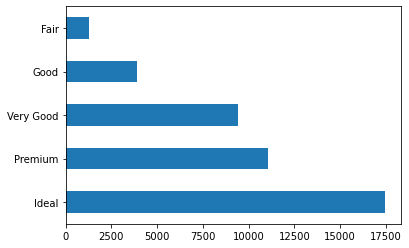

In [16]:
train["cut"].value_counts().plot.barh();


In [17]:
train['clarity'].unique()

array(['SI1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'VS1', 'IF'],
      dtype=object)

In [18]:
train['clarity'].value_counts()

SI1     10363
VS2      9981
SI2      7380
VS1      6479
VVS2     3959
VVS1     2838
IF       1483
I1        557
Name: clarity, dtype: int64

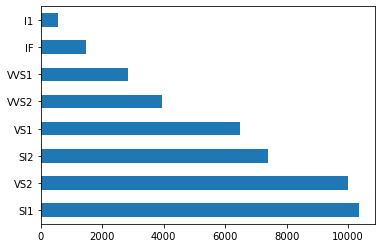

In [19]:
train["clarity"].value_counts().plot.barh();


In [20]:
train['color'].unique()

array(['E', 'I', 'J', 'F', 'H', 'D', 'G'], dtype=object)

In [21]:
train['color'].value_counts()

G    9080
E    7723
F    7527
H    6640
D    5555
I    4297
J    2218
Name: color, dtype: int64

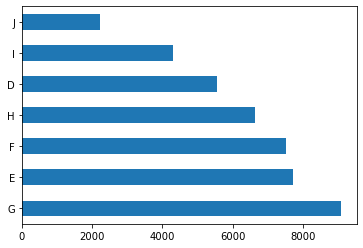

In [22]:
train["color"].value_counts().plot.barh();


Based on the figures above:

color: G, E, F are the most colors.

cut: the most cut is ideal, follows it premium then very good.

clarity: SI1, SI2, VS2 are the most clarity

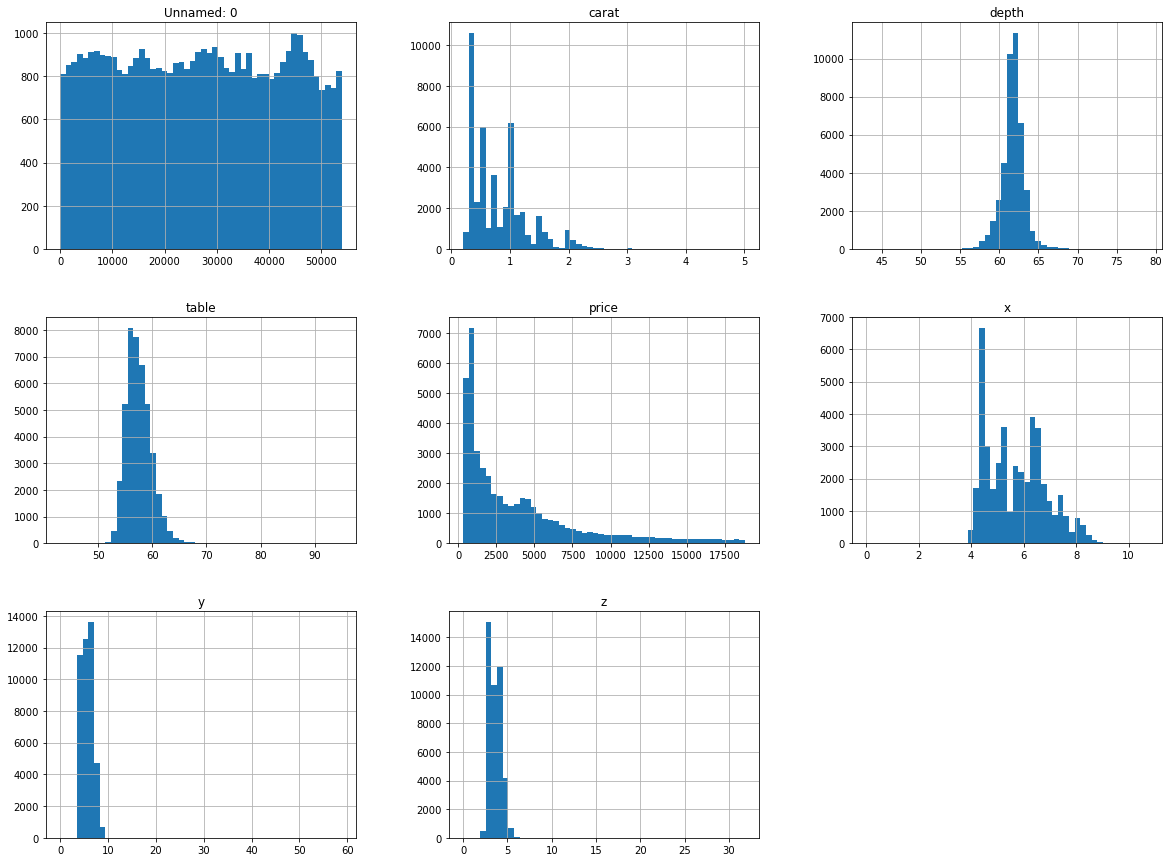

In [23]:
train.hist(bins=50, figsize=(20,15));

In [24]:
def pie(column):
    labels=train[column].unique()
    size=[]
    for i in labels:
        value=train[column].value_counts()[[i]]
        size.append(int(value.values))
    return labels,size

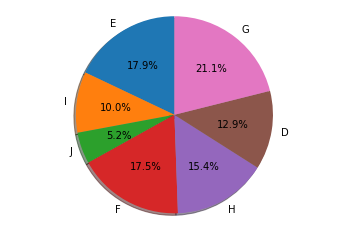

In [25]:
labels,sizes=pie('color')
fig1, ax1 = plt.subplots()
ax1.pie(x=sizes, labels=labels,shadow=True, startangle=90,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

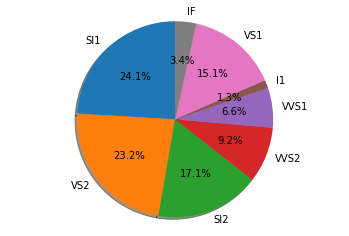

In [26]:
labels,sizes=pie('clarity')
fig1, ax1 = plt.subplots()
ax1.pie(x=sizes, labels=labels,shadow=True, startangle=90,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

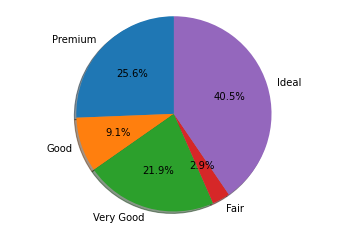

In [27]:
labels,sizes=pie('cut')
fig1, ax1 = plt.subplots()
ax1.pie(x=sizes, labels=labels,shadow=True, startangle=90,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

<AxesSubplot:xlabel='clarity', ylabel='price'>

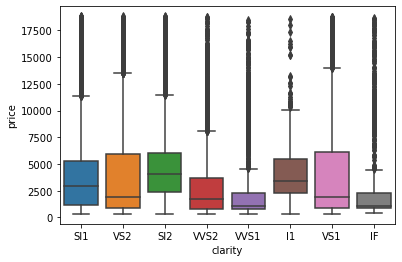

In [28]:
sns.boxplot( x=train["clarity"], y=train["price"] )

<AxesSubplot:xlabel='color', ylabel='price'>

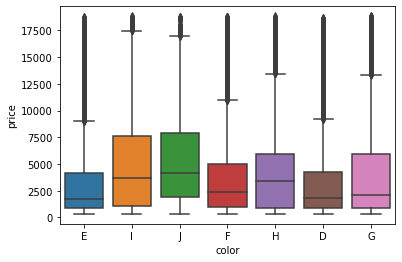

In [29]:
sns.boxplot( x=train["color"], y=train["price"] )

<AxesSubplot:xlabel='cut', ylabel='price'>

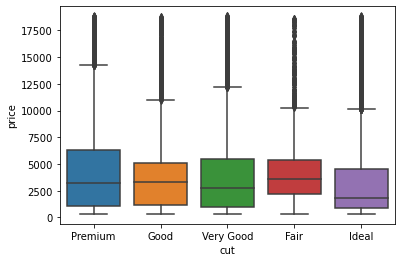

In [30]:
sns.boxplot( x=train["cut"], y=train["price"] )

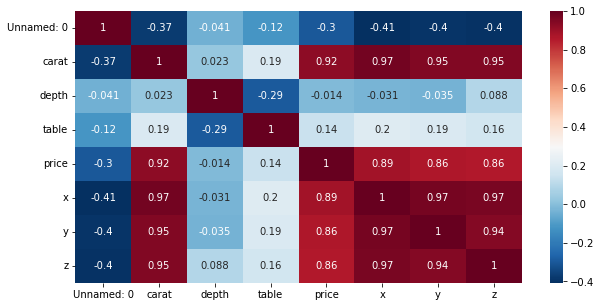

In [31]:
f, ax = plt.subplots(figsize=(10, 5))
ax =sns.heatmap(train.corr(), annot=True, cmap='RdBu_r',)
plt.show()

# Data Preparation for model

In [32]:
quality_map = {'Fair':1.0, 'Good':2.0, 'Very Good':3.0, 'Premium':4.0, 'Ideal':5.0}
color_map = {'D':7.0, 'E':6.0, 'F':5.0, 'G':4.0, 'H':3.0,'I':2.0,'J':1.0}
clarity_map = {'I1':1.0, 'SI2':2.0, 'SI1':3.0, 'VS2':4.0, 'VS1':5.0,'VVS2':6.0,'VVS1':7.0,'IF':8.0}

train['cut'] = train.cut.map(quality_map)
train['color'] = train.color.map(color_map)
train['clarity'] = train.clarity.map(clarity_map)
test['cut'] = test.cut.map(quality_map)
test['color'] = test.color.map(color_map)
test['clarity'] = test.clarity.map(clarity_map) 

In [33]:
train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,4.0,6.0,3.0,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,4.0,2.0,4.0,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,2.0,1.0,2.0,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,3.0,1.0,6.0,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,3.0,2.0,7.0,62.3,57.0,336,3.95,3.98,2.47


# dealing with outliers


outliers for training data

In [34]:
def outliers_iqr(train, feat):
    q25, q75 = np.percentile(train[feat], q=[25, 75])
    iqr = q75 - q25
    upp_lmt = q75 + iqr*1.45
    lwr_lmt = q25 - iqr*1.45
    return train[(train[feat] > upp_lmt) | (train[feat] < lwr_lmt)].index.to_list()

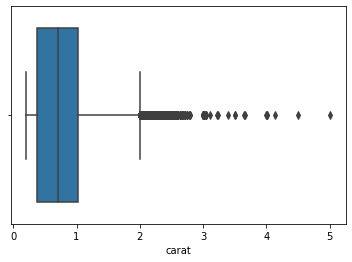

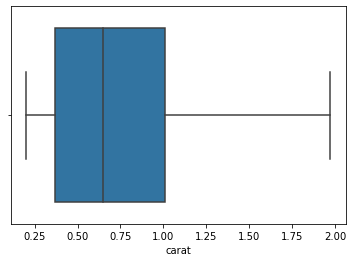

In [35]:
sns.boxplot(x=train['carat'])
plt.show()
train.drop(outliers_iqr(train, 'carat'), inplace=True)

sns.boxplot(x=train['carat'])

plt.show()

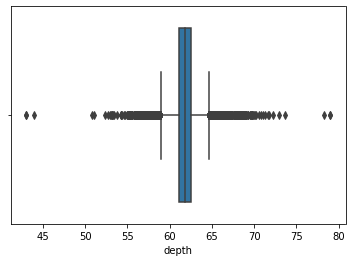

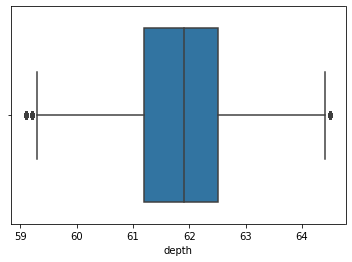

In [36]:
sns.boxplot(x=train['depth'])
plt.show()
train.drop(outliers_iqr(train, 'depth'), inplace=True)

sns.boxplot(x=train['depth'])

plt.show()

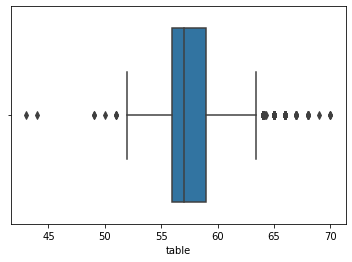

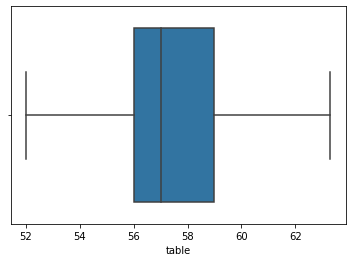

In [37]:
sns.boxplot(x=train['table'])
plt.show()
train.drop(outliers_iqr(train, 'table'), inplace=True)

sns.boxplot(x=train['table'])

plt.show()

In [38]:
train['table'].shape

(38505,)

<AxesSubplot:>

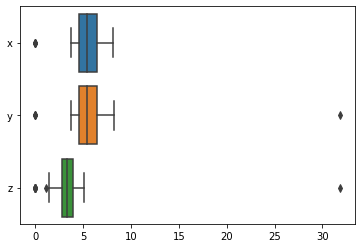

In [39]:
sns.boxplot(data=train[["x", "y" , 'z']], orient="h" )

In [40]:
train.loc[train[(train['z']==0)|(train['z']>15)].index,'z']=train['z'].median()
train.loc[train[train['x']==0].index,'x']=train['x'].median()
train.loc[train[(train['y']==0)|(train['y']>15)].index,'y']=train['y'].median()
test.loc[test[(test['z']==0)|(test['z']>15)].index,'z']=test['z'].median()
test.loc[test[test['x']==0].index,'x']=test['x'].median()
test.loc[test[(test['y']==0)|(test['y']>15)].index,'y']=test['y'].median()

In [41]:
train['size']=train['x']*train['y']*train['z']
test['size']=test['x']*test['y']*test['z']
train.drop(columns=['x','y','z'],axis=1,inplace=True)
test.drop(columns=['x','y','z'],axis=1,inplace=True)

<AxesSubplot:>

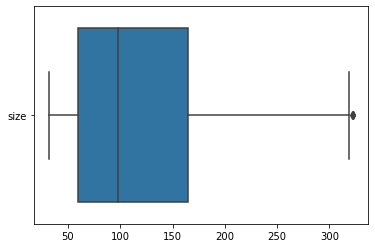

In [42]:
sns.boxplot(data=train[['size']], orient="h" )

In [43]:
train.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'size'],
      dtype='object')

# Split Data

In [44]:
train_X = train.drop("price", axis=1)
train_y = np.log(train.price)

In [45]:
test_X=test.copy()
test_y=pd.read_csv('y_true.csv').values

In [46]:
test_y.shape

(10900, 1)

# Apply xgboost

In [47]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_reg = xgb.XGBRegressor(objective='reg:squarederror',learning_rate =0.01,n_estimators=2045, booster = 'gbtree', 
                                     max_depth=8,min_child_weight=10 ,base_score=0.8,
                                     gamma=0.01, subsample=0.7,
                                     colsample_bytree=0.7,nthread=4,reg_lambda=0.0571,
                                     scale_pos_weight=1,seed=27, random_state=42,
                                     reg_alpha=0.006)

xg_reg.fit(train_X, train_y)

preds = xg_reg.predict(test_X)
print ('RMSE is: \n', mean_squared_error(test_y, np.exp(preds),squared=False))  #490.26381431390087(without unnamed col)//130.59370086552389(with unnamed col)


RMSE is: 
 168.41958942074686


In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf = RandomForestRegressor(n_estimators=2000,
                         min_samples_split=10,
                         min_samples_leaf=4,
                        max_features = 'sqrt',
                        max_depth=100,
                          bootstrap=False,
                           random_state=42)

rf.fit(train_X,train_y)

preds = rf.predict(test_X)
print ('RMSE is: \n', mean_squared_error(test_y, np.exp(preds),squared=False))# 340.3973811181054(depth=10)


RMSE is: 
 412.9889868420923


In [49]:
from sklearn.tree import DecisionTreeRegressor

DT=DecisionTreeRegressor(max_depth=10)

DT.fit(train_X,train_y)

preds = DT.predict(test_X)
print ('RMSE is: \n', mean_squared_error(test_y, np.exp(preds),squared=False))

RMSE is: 
 48.93241691849692


In [50]:
testing = pd.read_csv("test.csv")

In [51]:
sub = pd.DataFrame()
sub['Unnamed: 0'] = testing['Unnamed: 0']
sub['price'] = np.exp(preds)
sub.to_csv('submissionj.csv',index=False)